In [1]:
import pandas as pd
import numpy as np

### Data preparation

In [2]:
# Load in datasets
# pup = main dataset
# pk = personal characteristics dataset
# per = period dataset

pup = pd.read_excel("data/pupils.xlsx", header=[0,1], index_col=[0])
pk = pd.read_excel("data/persoonskenmerken.xlsx")
per = pd.read_excel("data/perioden.xlsx")

In [3]:
# print shape of main dataset

print(pup.shape)
pup.head()

(69, 38)


ID  Persoonskenmerken           Perioden AantalMinutenHuiswerkPerDag_1  \
   Unnamed: 1_level_1 Unnamed: 2_level_1            Unnamed: 3_level_1   
0                  10           1997JJ00                         108.0   
1                  10           2001JJ00                         103.0   
2                  10           2003JJ00                         100.0   
3                  11           1997JJ00                         102.0   
4                  11           2001JJ00                          92.0   

ID HuiswerkWelEensInKnoeiBijbaanWerk_2 Ervaren moeilijkheidsgraad opleiding  \
                    Unnamed: 4_level_1                         JaMoeilijk_3   
0                                  8.0                                 12.0   
1                                 26.0                                 12.0   
2                                 21.0                                 11.0   
3                                  7.0                                 13.0   
4                                 22.0                                 12.0   

ID                                Opleiding komt overeen met eigen beeld  \
   HetGaatWel_4 NeeNietMoeilijk_5                                   Ja_6   
0          42.0              45.0                                   65.0   
1          42.0              46.0                                   58.0   
2          43.0              46.0                                   63.0   
3          41.0              46.0                                   63.0   
4          42.0              46.0                                   59.0   

ID                       ... Contact met medeleerlingen/studenten  \
   Gedeeltelijk_7 Nee_8  ...                              Soms_27   
0            21.0  14.0  ...                                  NaN   
1            23.0  18.0  ...                                 30.0   
2            21.0  16.0  ...                                 32.0   
3            22.0  15.0  ...                                  NaN   
4            24.0  18.0  ...                                 31.0   

ID                  Vooruitz. afronding/afbreken huid. opl.  \
   ZeldenOfNooit_28                  VerderLerenStuderen_29   
0               NaN                                    55.0   
1              14.0                                    52.0   
2              14.0                                    55.0   
3               NaN                                    54.0   
4              14.0                                    50.0   

ID                                                                      \
   SolliciterenGaanWerken_30 WerkenEnTegelijkStuderen_31 IetsAnders_32   
0                       26.0                        16.0           3.0   
1                       24.0                        18.0           5.0   
2                       25.0                        16.0           4.0   
3                       24.0                        18.0           3.0   
4                       26.0                        19.0           4.0   

ID                        Schoolverzuim                         \
   WelEensGespijbeldOfLessenVerzuimd_33 AantalUrenSpijbelen_34   
0                                  22.0                    2.0   
1                                  22.0                    3.0   
2                                  20.0                    2.0   
3                                  22.0                    3.0   
4                                  24.0                    3.0   

ID                                                               
   VerzuimdWegensZiekteOngevalED_35 AantalDagenZiekteverzuim_36  
0                              26.0                         4.0  
1                              34.0                         4.0  
2                              33.0                         3.0  
3                              24.0                         4.0  
4                              33.0                         3.0  

[5 rows x 38 columns]

**Aantal minuten huiswerk per dag**<br>
Gemiddeld aantal minuten huiswerk en studie afgezien van les-, college- en praktijkuren.

**Huiswerk wel eens in knoei: bijbaan/werk**<br>
Het percentage personen dat aangeeft dat het huiswerk wel eens in de knoei komt in verband met de (bij)baan, gepercenteerd over degenen met een (bij)baan.

**Ervaren moeilijkheidsgraad opleiding**<br>
Het betreft het antwoord op de vraag: Vind je de opleiding moeilijk.

**Opleiding komt overeen met eigen beeld**<br>
Het betreft het antwoord op de vraag: Vind je dat de opleiding die je nu volgt overeenkomt met het beeld dat je er van had?

**Tevredenheid opleiding**<br>
Het betreft het antwoord op de vraag: Hoe bevalt de school/opleiding, alles bij elkaar genomen?

**Tevredenheid studieprestaties**<br>
Het betreft het antwoord op de vraag: Ben je zelf tevreden met je studieprestaties?

**Op hoogte toekomstige beroepsmogelijkh.**<br>
Het betreft degenen die 'ja' antwoorden op de vraag: Vind je dat je voldoende op de hoogte bent van de beroepsmogelijkheden die er straks voor je zijn.

**Op de hoogte hoe je moet solliciteren**<br>
Het betreft degenen die 'ja' antwoorden op de vraag: Vind je dat je voldoende op de hoogte bent van hoe je moet solliciteren.

**Contact met medeleerlingen/studenten**<br>
Het betreft het antwoord op de vraag: Ga je ook buiten de opleiding om met je medeleerlingen/medestudenten.

**Vooruitz. afronding/afbreken huid. opl.**<br>
Het betreft het antwoord op de vraag: Wat ga je doen als je deze opleiding afgerond hebt of als je deze afbreekt?

In [4]:
pup['Schoolverzuim'].head()

,WelEensGespijbeldOfLessenVerzuimd_33,AantalUrenSpijbelen_34,VerzuimdWegensZiekteOngevalED_35,AantalDagenZiekteverzuim_36
0,22.0,2.0,26.0,4.0
1,22.0,3.0,34.0,4.0
2,20.0,2.0,33.0,3.0
3,22.0,3.0,24.0,4.0
4,24.0,3.0,33.0,3.0


In [5]:
pup['Schoolverzuim'].iloc[:, 0].head()

0    22.0
1    22.0
2    20.0
3    22.0
4    24.0
Name: WelEensGespijbeldOfLessenVerzuimd_33, dtype: float64

In [6]:
# Our main dataset consists of a 2-layer header while our pk and per datasets consist of 1-layer headers, 
# if we want to merge our pk and per datasets with the main dataset we have to add an extra layer to both these datasets

pk.columns = ['pk_key', 'pk_value', 'pk_description']
pk.columns = [pk.columns, pk.columns]

pk.head()

,pk_key,pk_value,pk_description
,pk_key,pk_value,pk_description
0,10,Totaal persoonskenmerken,NaN
1,11,Mannen,NaN
2,12,Vrouwen,NaN
3,14,12-17-jarigen,NaN
4,15,18-24-jarigen,NaN


In [7]:
per.columns = ['per_key', 'per_year', 'per_descripion', 'per_status']
per.columns = [per.columns, per.columns]

per.head()

,per_key,per_year,per_descripion,per_status
,per_key,per_year,per_descripion,per_status
0,1997JJ00,1997,NaN,Definitief
1,2001JJ00,2001,NaN,Definitief
2,2003JJ00,2003,NaN,Definitief


In [8]:
# Merge our three datasets

df = pup.merge(pk, left_on=pup['Persoonskenmerken'].iloc[:,0], right_on=pk['pk_key'].iloc[:,0], how="left").drop(['key_0'],axis=1)\
        .merge(per, left_on=pup['Perioden'].iloc[:,0], right_on=per['per_key'].iloc[:,0], how="left").drop(['key_0'],axis=1)

c:\users\sebas\miniconda3\lib\site-packages\pandas\core\generic.py:3884: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [9]:
df.head()

ID  Persoonskenmerken           Perioden AantalMinutenHuiswerkPerDag_1  \
   Unnamed: 1_level_1 Unnamed: 2_level_1            Unnamed: 3_level_1   
0                  10           1997JJ00                         108.0   
1                  10           2001JJ00                         103.0   
2                  10           2003JJ00                         100.0   
3                  11           1997JJ00                         102.0   
4                  11           2001JJ00                          92.0   

ID HuiswerkWelEensInKnoeiBijbaanWerk_2 Ervaren moeilijkheidsgraad opleiding  \
                    Unnamed: 4_level_1                         JaMoeilijk_3   
0                                  8.0                                 12.0   
1                                 26.0                                 12.0   
2                                 21.0                                 11.0   
3                                  7.0                                 13.0   
4                                 22.0                                 12.0   

ID                                Opleiding komt overeen met eigen beeld  \
   HetGaatWel_4 NeeNietMoeilijk_5                                   Ja_6   
0          42.0              45.0                                   65.0   
1          42.0              46.0                                   58.0   
2          43.0              46.0                                   63.0   
3          41.0              46.0                                   63.0   
4          42.0              46.0                                   59.0   

ID                       ...          Schoolverzuim  \
   Gedeeltelijk_7 Nee_8  ... AantalUrenSpijbelen_34   
0            21.0  14.0  ...                    2.0   
1            23.0  18.0  ...                    3.0   
2            21.0  16.0  ...                    2.0   
3            22.0  15.0  ...                    3.0   
4            24.0  18.0  ...                    3.0   

ID                                                              pk_key  \
   VerzuimdWegensZiekteOngevalED_35 AantalDagenZiekteverzuim_36 pk_key   
0                              26.0                         4.0     10   
1                              34.0                         4.0     10   
2                              33.0                         3.0     10   
3                              24.0                         4.0     11   
4                              33.0                         3.0     11   

ID                  pk_value pk_description   per_key per_year per_descripion  \
                    pk_value pk_description   per_key per_year per_descripion   
0   Totaal persoonskenmerken            NaN  1997JJ00     1997            NaN   
1   Totaal persoonskenmerken            NaN  2001JJ00     2001            NaN   
2   Totaal persoonskenmerken            NaN  2003JJ00     2003            NaN   
3                     Mannen            NaN  1997JJ00     1997            NaN   
4                     Mannen            NaN  2001JJ00     2001            NaN   

ID  per_status  
    per_status  
0   Definitief  
1   Definitief  
2   Definitief  
3   Definitief  
4   Definitief  

[5 rows x 45 columns]

### Data Exploration

In [10]:
df.shape

(69, 45)

In [11]:
df.describe()

ID     Persoonskenmerken AantalMinutenHuiswerkPerDag_1  \
      Unnamed: 1_level_1            Unnamed: 3_level_1   
count          69.000000                     55.000000   
mean           31.826087                    104.581818   
std            14.377225                     19.191714   
min            10.000000                     54.000000   
25%            16.000000                     92.000000   
50%            38.000000                    103.000000   
75%            44.000000                    112.500000   
max            53.000000                    157.000000   

ID    HuiswerkWelEensInKnoeiBijbaanWerk_2  \
                       Unnamed: 4_level_1   
count                           54.000000   
mean                            17.814815   
std                             11.084707   
min                              1.000000   
25%                              9.000000   
50%                             16.500000   
75%                             23.750000   
max                             52.000000   

ID    Ervaren moeilijkheidsgraad opleiding                                 \
                              JaMoeilijk_3 HetGaatWel_4 NeeNietMoeilijk_5   
count                            60.000000    60.000000         60.000000   
mean                             12.250000    41.566667         46.166667   
std                               4.304609     3.581339          4.283063   
min                               2.000000    29.000000         37.000000   
25%                              10.000000    39.000000         44.000000   
50%                              12.000000    42.000000         46.000000   
75%                              14.000000    43.250000         47.250000   
max                              24.000000    50.000000         60.000000   

ID    Opleiding komt overeen met eigen beeld                            \
                                        Ja_6 Gedeeltelijk_7      Nee_8   
count                              54.000000      54.000000  54.000000   
mean                               61.555556      21.759259  16.703704   
std                                 6.017793       3.971289   3.912388   
min                                43.000000      12.000000   9.000000   
25%                                59.000000      19.250000  14.250000   
50%                                63.000000      21.000000  16.000000   
75%                                65.750000      23.000000  18.000000   
max                                73.000000      36.000000  30.000000   

ID          Verwachtingen en realiteit  ...  \
      OpleidingMoeilijkerDanVerwacht_9  ...   
count                        54.000000  ...   
mean                          6.592593  ...   
std                           3.025168  ...   
min                           0.000000  ...   
25%                           5.000000  ...   
50%                           6.500000  ...   
75%                           8.000000  ...   
max                          14.000000  ...   

ID    Vooruitz. afronding/afbreken huid. opl.                              \
                    SolliciterenGaanWerken_30 WerkenEnTegelijkStuderen_31   
count                               55.000000                   55.000000   
mean                                27.236364                   18.036364   
std                                 13.470082                    5.466950   
min                                  4.000000                    5.000000   
25%                                 20.000000                   15.000000   
50%                                 24.000000                   17.000000   
75%                                 33.500000                   20.000000   
max                                 57.000000                   32.000000   

ID                                         Schoolverzuim  \
      IetsAnders_32 WelEensGespijbeldOfLessenVerzuimd_33   
count     55.000000                            60.000000   
mean       4.218182               

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme()

In [13]:
df['HuiswerkWelEensInKnoeiBijbaanWerk_2'].iloc[:,0]

0      8.0
1     26.0
2     21.0
3      7.0
4     22.0
      ... 
64    20.0
65    21.0
66     9.0
67    21.0
68    16.0
Name: Unnamed: 4_level_1, Length: 69, dtype: float64

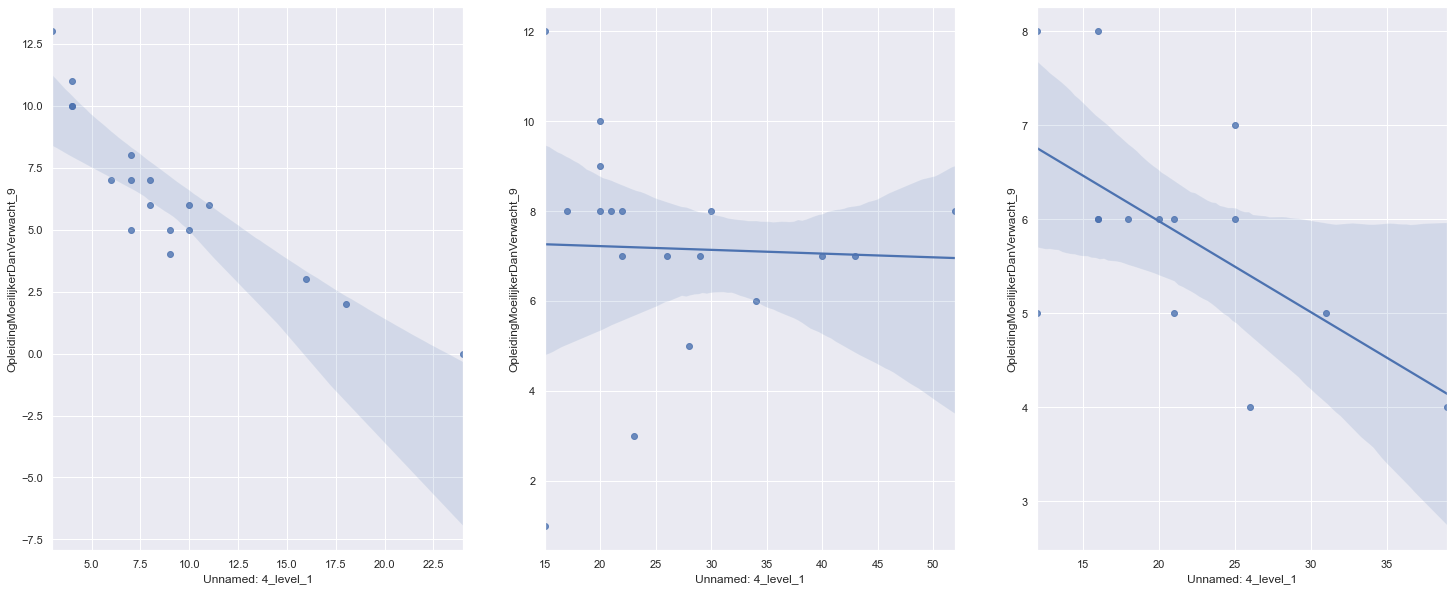

In [23]:
# Note that for the x and y axis we actually have to select the 2nd header dimension
# We use .iloc[:,0] when a header has no subheader, this way we just select the first subheader

f, axes = plt.subplots(1, 3, figsize=(25, 10))

for i, year in enumerate(per['per_year'].iloc[:,0]):
    sns.regplot(x=df[df['per_year']['per_year'] == year]['HuiswerkWelEensInKnoeiBijbaanWerk_2'].iloc[:,0], 
                    y=df[df['per_year']['per_year'] == year]['Verwachtingen en realiteit']["OpleidingMoeilijkerDanVerwacht_9"], ax=axes[i])
    
plt.show()

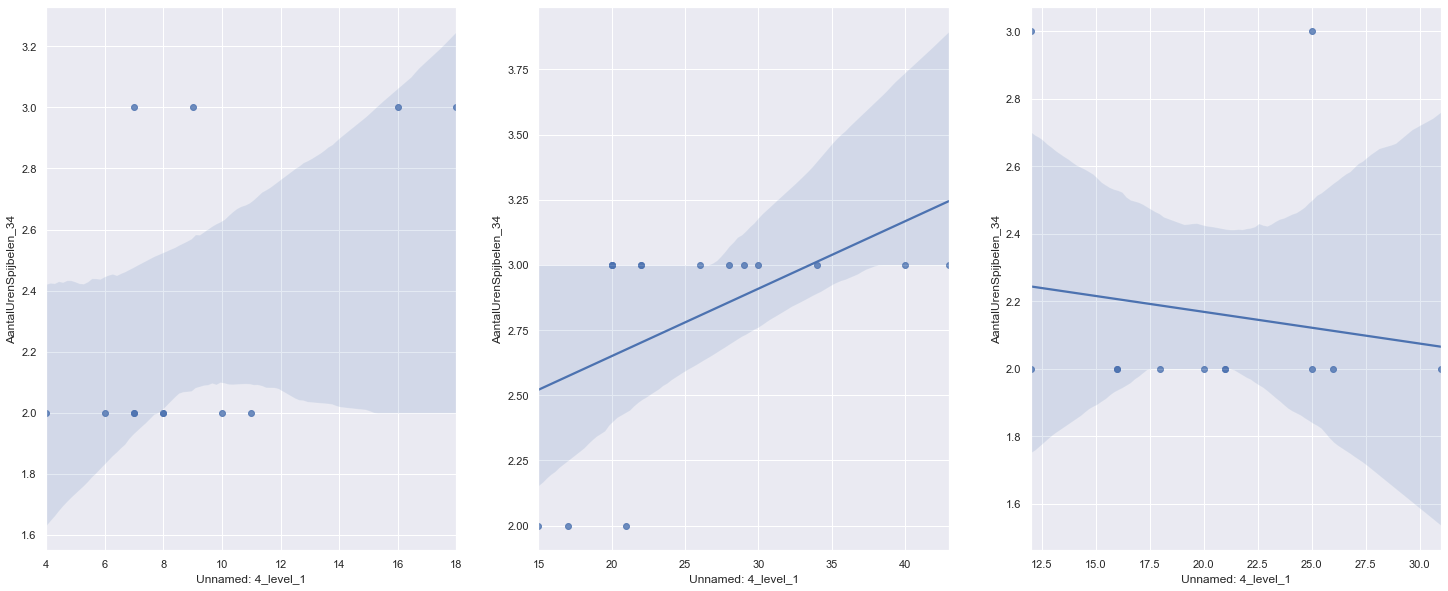

In [20]:
f, axes = plt.subplots(1, 3, figsize=(25, 10))

for i, year in enumerate(per['per_year'].iloc[:,0]):
    sns.regplot(x=df[df['per_year']['per_year'] == year]['HuiswerkWelEensInKnoeiBijbaanWerk_2'].iloc[:,0], 
                    y=df[df['per_year']['per_year'] == year]['Schoolverzuim']["AantalUrenSpijbelen_34"], ax=axes[i])
    
plt.show()

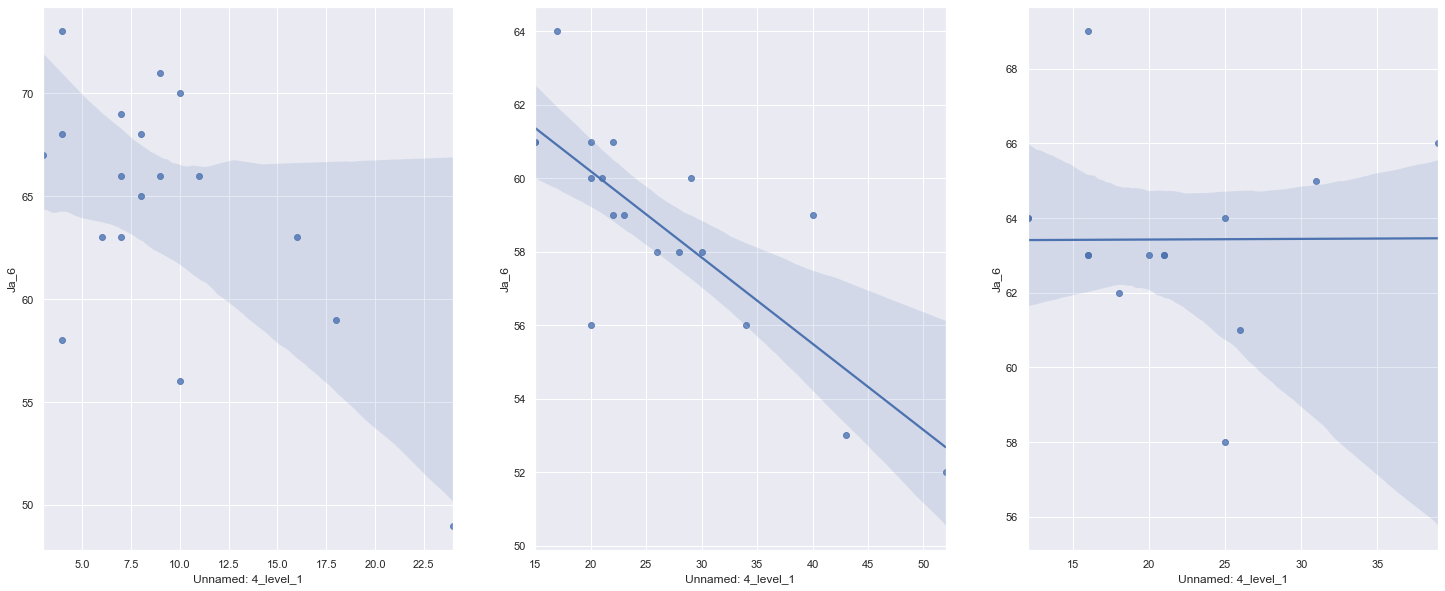

In [21]:
f, axes = plt.subplots(1, 3, figsize=(25, 10))

for i, year in enumerate(per['per_year'].iloc[:,0]):
    sns.regplot(x=df[df['per_year']['per_year'] == year]['HuiswerkWelEensInKnoeiBijbaanWerk_2'].iloc[:,0], 
                    y=df[df['per_year']['per_year'] == year]['Opleiding komt overeen met eigen beeld']["Ja_6"], ax=axes[i])
    
plt.show()

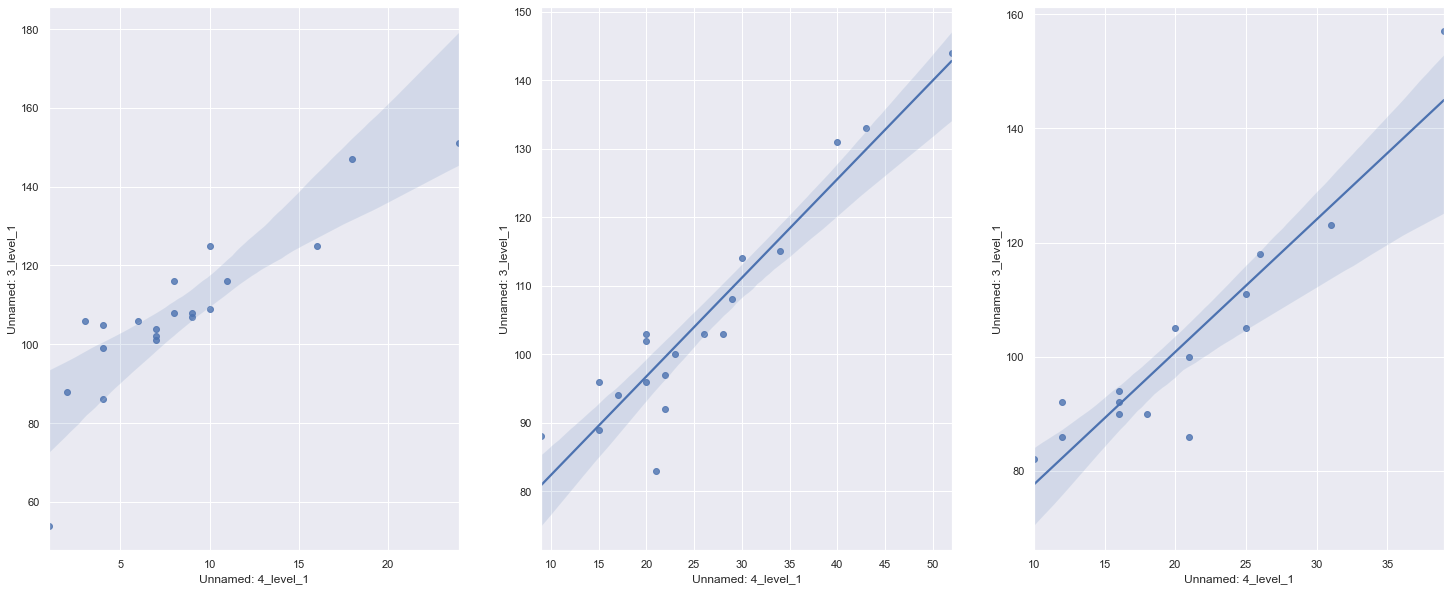

In [22]:
f, axes = plt.subplots(1, 3, figsize=(25, 10))

for i, year in enumerate(per['per_year'].iloc[:,0]):
    sns.regplot(x=df[df['per_year']['per_year'] == year]['HuiswerkWelEensInKnoeiBijbaanWerk_2'].iloc[:,0], 
                    y=df[df['per_year']['per_year'] == year]['AantalMinutenHuiswerkPerDag_1'].iloc[:,0], ax=axes[i])
    
plt.show()